In [1]:
%pylab inline
execfile("myhelpers.py")

Populating the interactive namespace from numpy and matplotlib


/home/bkasap/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#set plot attributes
fig_width = 5  # width in inches
fig_height = 3  # height in inches
fig_size =  [fig_width,fig_height]

fig_width_pt = 300                      # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/96                  # Convert pt to inch
golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
#fig_height = fig_width*0.35            # height in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'Agg',
          'axes.labelsize': 6.5,
          'axes.titlesize': 6.5,
          #'font.size': 6.5,
          'xtick.labelsize': 5.5,
          'ytick.labelsize': 5.5,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'figure.figsize': fig_size,
          'savefig.dpi' : 600,
          'font.family': 'sans-serif',
          'axes.linewidth' : 0.5,
          'xtick.major.size' : 1.5,
          'ytick.major.size' : 1.5,
          'font.size' : 8,
          'figure.autolayout' : False,
          'legend.fontsize': 6,
          #'legend.linewidth': 1,
          'legend.numpoints': 1,
          'legend.fancybox': True}

rcParams.update(params)

In [3]:
amp=31
direction=30
exc=0.45
inh=0.14
dur=100
I=150

### Population spike count

3.4339872044851463 0.5235987755982988 3.425 0.525 0.00909578332425


(-1.5707963267948966, 1.5707963267948966)

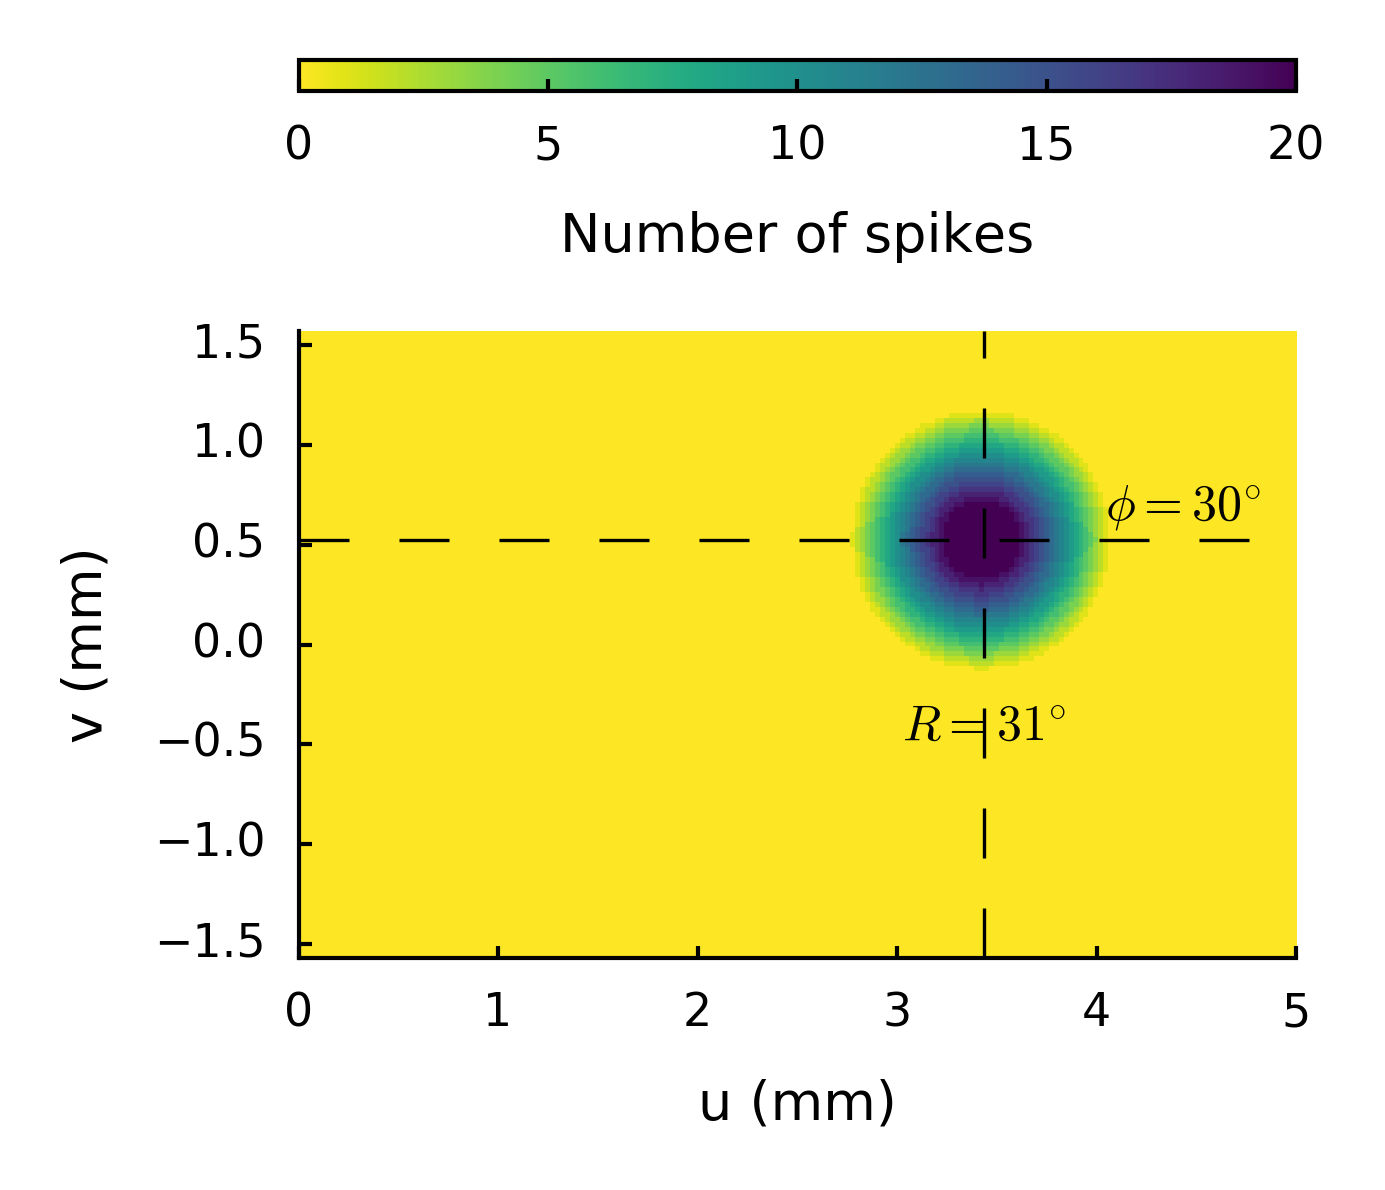

In [4]:
filenamebase = 'run/lat_1_inp_'+str(I)+'_dur_'+str(dur)+'_amp_'+str(amp)+'_dir_'+str(direction)+'_e_%6.4f_i_%6.4f_' % (exc, inh)

neuron = p.read_csv(filenamebase+"neuroninfo.csv", ' ')
spikes = p.read_csv(filenamebase+"spiketimes.csv", ' ')
neuron = neuron.values
spikes = spikes.values

numspks=np.copy(neuron[1:,4])
nspks = numspks.reshape((201,201))

ccid = neuron[0,0]

(ver, hor) = divmod(ccid, 201)

#step size between neurons to plot the firing rate
#horizontal by x, vertical by 201*x
neuronshor = ccid+4*arange(-21, 20)
neuronsver = ccid+804*arange(-21, 20)

u = log(amp)
v = deg2rad(direction)
dist = math.sqrt((u - neuron[0,1])**2 + (v - neuron[0,2])**2)
print u, v, neuron[0,1], neuron[0,2], dist

im1 = imshow(nspks, interpolation='nearest', origin='lower', extent=[0, 5, -2.5, 2.5], cmap='viridis_r', vmin=0, vmax=20)
plot([u, u], [-pi/2, pi/2], '--k', lw=0.4)
plot([0, 5], [v, v], '--k', lw=0.4)
text(u, v-1., r'$R = '+str(amp)+r'^{\circ}$', horizontalalignment='center', fontsize=6)
text(u+1, v+0.1, r'$\phi = '+str(direction)+'^{\circ}$', horizontalalignment='center', fontsize=6)

ax1 = gca()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('top', size='5%', pad=0.4)

cb1 = plt.colorbar(im1, cax=cax, ticks=[0, 5, 10, 15, 20], orientation='horizontal')
cb1.set_label('Number of spikes')
cb1.ax.set_xticklabels([0, 5, 10, 15, 20], rotation='horizontal')
#cb1.set_ticklabels([0, 5, 10, 15, 20])#, orientation='vertical')
simpleaxis(ax1)

ax1.set_xlabel('u (mm)')
ax1.set_ylabel('v (mm)')
ax1.set_ylim(-pi/2, pi/2)


### Firing rates

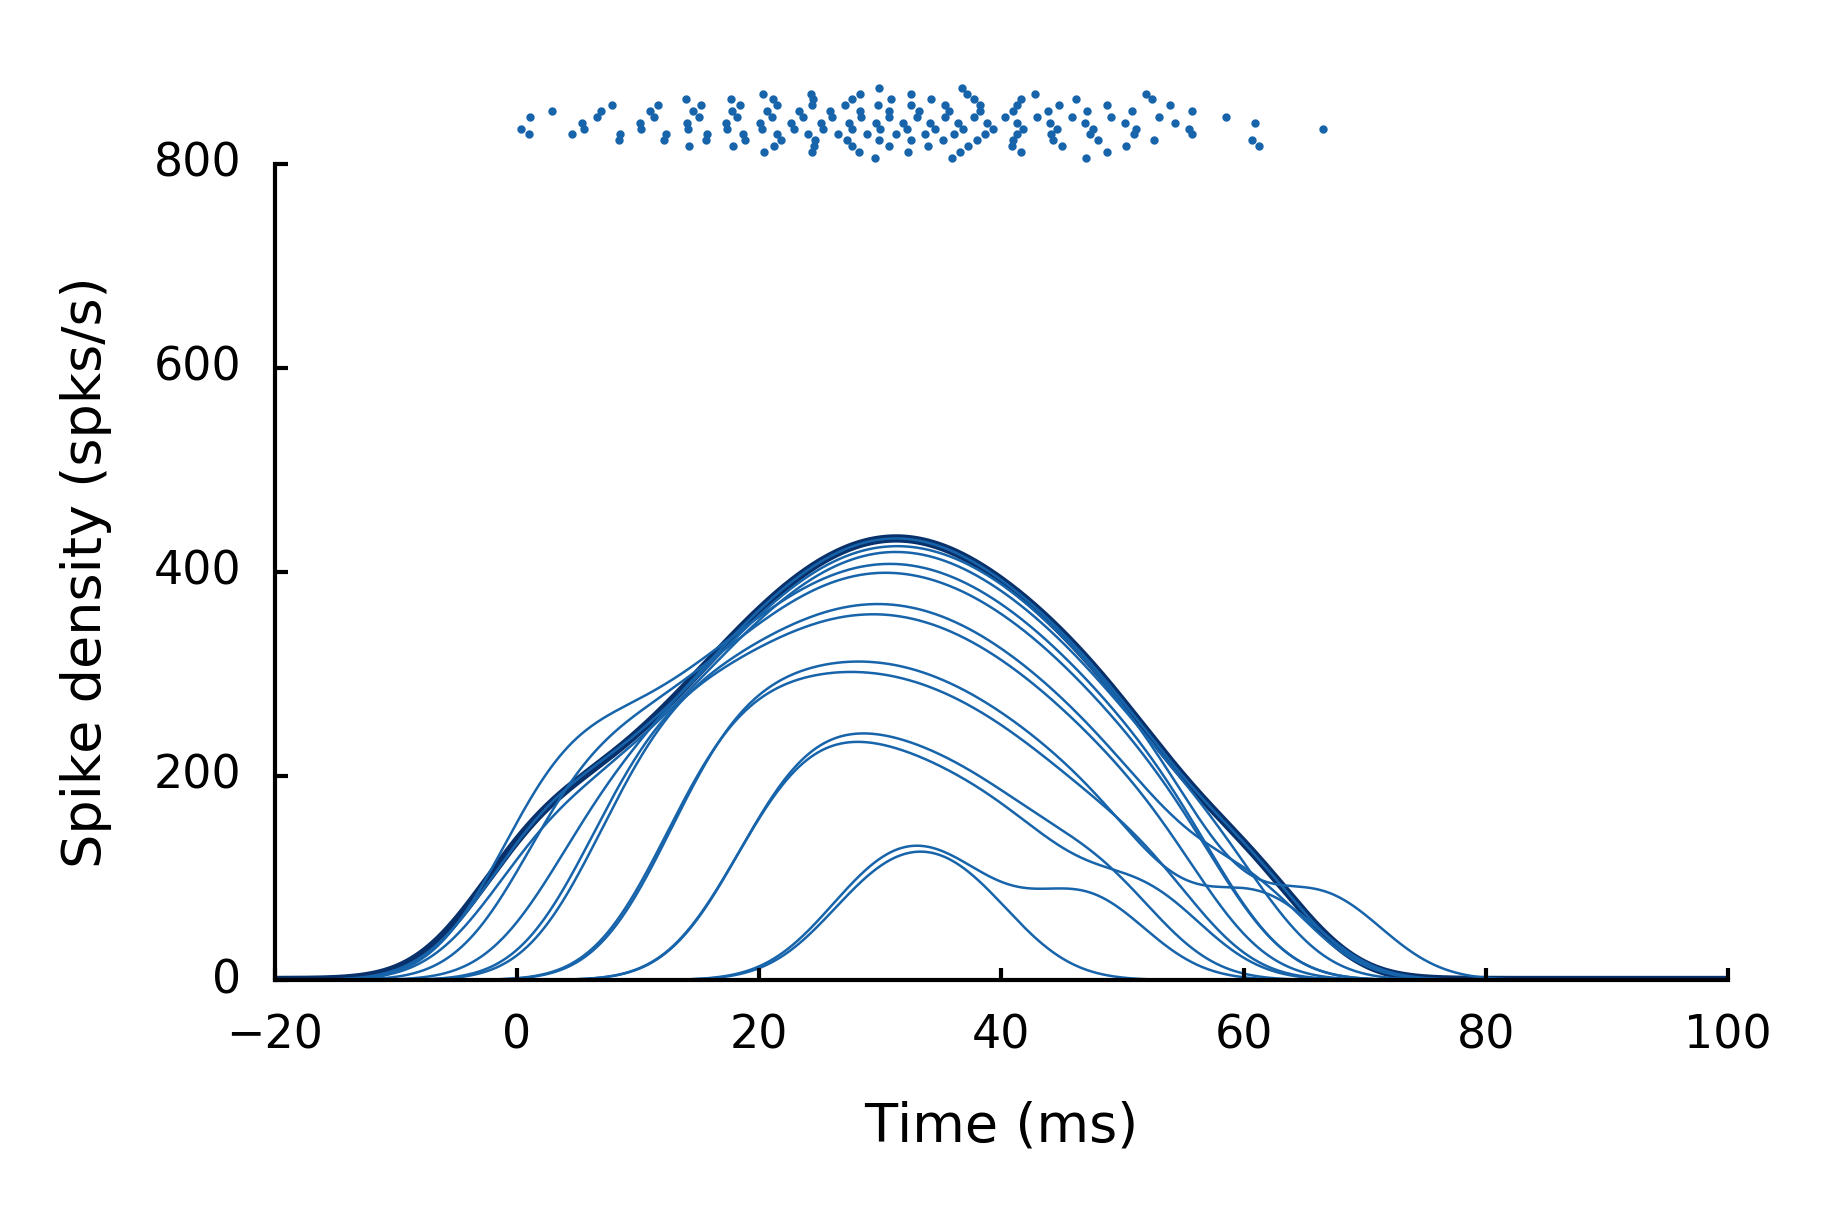

In [5]:
stcent = getspiketrain(spikes, ccid)
start = stcent[0]


centfr = frate(stcent)
plot(np.linspace(0, len(centfr)/100, len(centfr))-start, centfr, color=colorpic1(1.), lw=1.)

ax2= gca()
divider = make_axes_locatable(ax2)
axsp = divider.append_axes('top', size='10%', pad=0, sharex=ax2)

for i, nid in enumerate(neuronshor):
    st = getspiketrain(spikes, nid)
    st = st[st>start]

    firing = frate(st)
    ax2.plot(np.linspace(0, len(firing)/100, len(firing))-start, firing, color=colorpic1(0.8), lw=0.3)
    axsp.plot(st-start, np.ones(len(st))*400+i*5, '.', ms=1, color=colorpic1(0.8))

x1 = 0
x2 = 80

ax2.set_xlim((x1-20), (x2+20))
ax2.set_ylim(0, 800)


simpleaxis(ax2)
axsp.axis('off')

ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Spike density (spks/s)')
ax2.set_yticks([0, 200, 400, 600, 800])

### Eye movement traces and interpolation

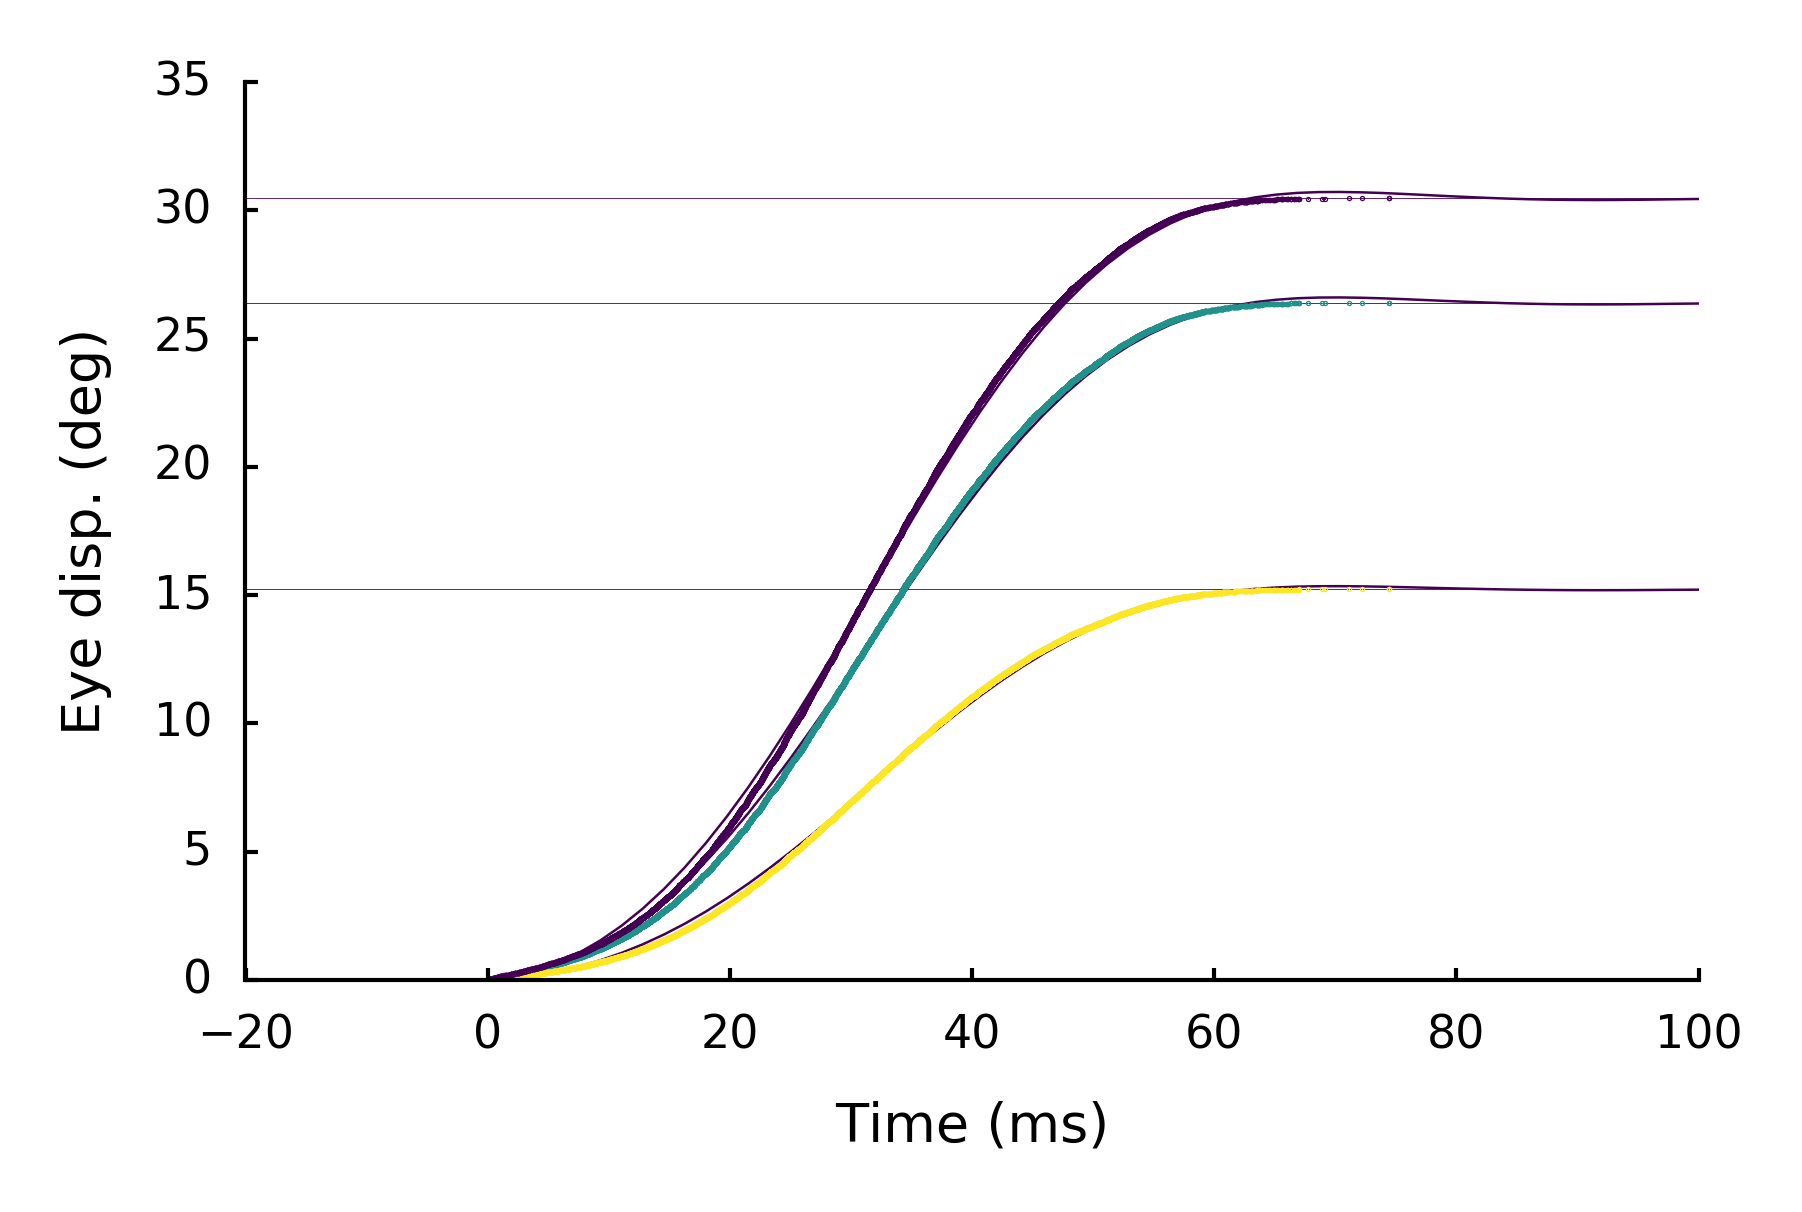

In [6]:
filenamebasetune = 'run/lat_1_inp_'+str(I)+'_dur_'+str(dur)+'_amp_21_dir_0_e_%6.4f_i_%6.4f_' % (exc, inh)

time, hor, ver = eyetrace(filenamebasetune)
k = 21*cos(deg2rad(0))/cumsum(hor)[-1]

time, hor, ver = eyetrace(filenamebase)
disp = sqrt((k*cumsum(hor))**2 + (k*cumsum(ver))**2)

f = interpolate.interp1d(time, disp, kind='nearest', fill_value='extrapolate')
tnew = np.linspace(time[0]-50, time[-1]+50, 101)
pnew = f(tnew)

psmooth = savitzky_golay(pnew, window_size=51, order=5)

fhor = interpolate.interp1d(time, k*cumsum(hor), kind='nearest', fill_value='extrapolate')
fver = interpolate.interp1d(time, k*cumsum(ver), kind='nearest',fill_value='extrapolate')

phornew = fhor(tnew)
pvernew = fver(tnew)
phorsmooth = savitzky_golay(phornew, window_size=51, order=5)
pversmooth = savitzky_golay(pvernew, window_size=51, order=5)

#testing
plot(tnew-start, psmooth, color=colorpic3(0.), lw=0.3)
plot(tnew-start, phorsmooth, color=colorpic3(0.), lw=0.3)
plot(tnew-start, pversmooth, color=colorpic3(0.), lw=0.3)

plot(tnew-start, np.ones_like(tnew)*psmooth[-1], color=colorpic3(0.), lw=0.1)
plot(tnew-start, np.ones_like(tnew)*phorsmooth[-1], color=colorpic3(0.), lw=0.1)
plot(tnew-start, np.ones_like(tnew)*pversmooth[-1], color=colorpic3(0.), lw=0.1)

plot(time-start, k*cumsum(hor), '.', color=colorpic3(0.5), ms=0.3)
plot(time-start, k*cumsum(ver), '.', color=colorpic3(1.), ms=0.3)
plot(time-start, disp, '.', color=colorpic3(0.), ms=0.3)

ax = gca()
ax.set_xlim((x1-20), (x2+20))
ax.set_ylim(0, 35)


simpleaxis(ax)
ax.set_ylabel('Eye disp. (deg)')
ax.set_xlabel('Time (ms)')

### Eye velocity during movement

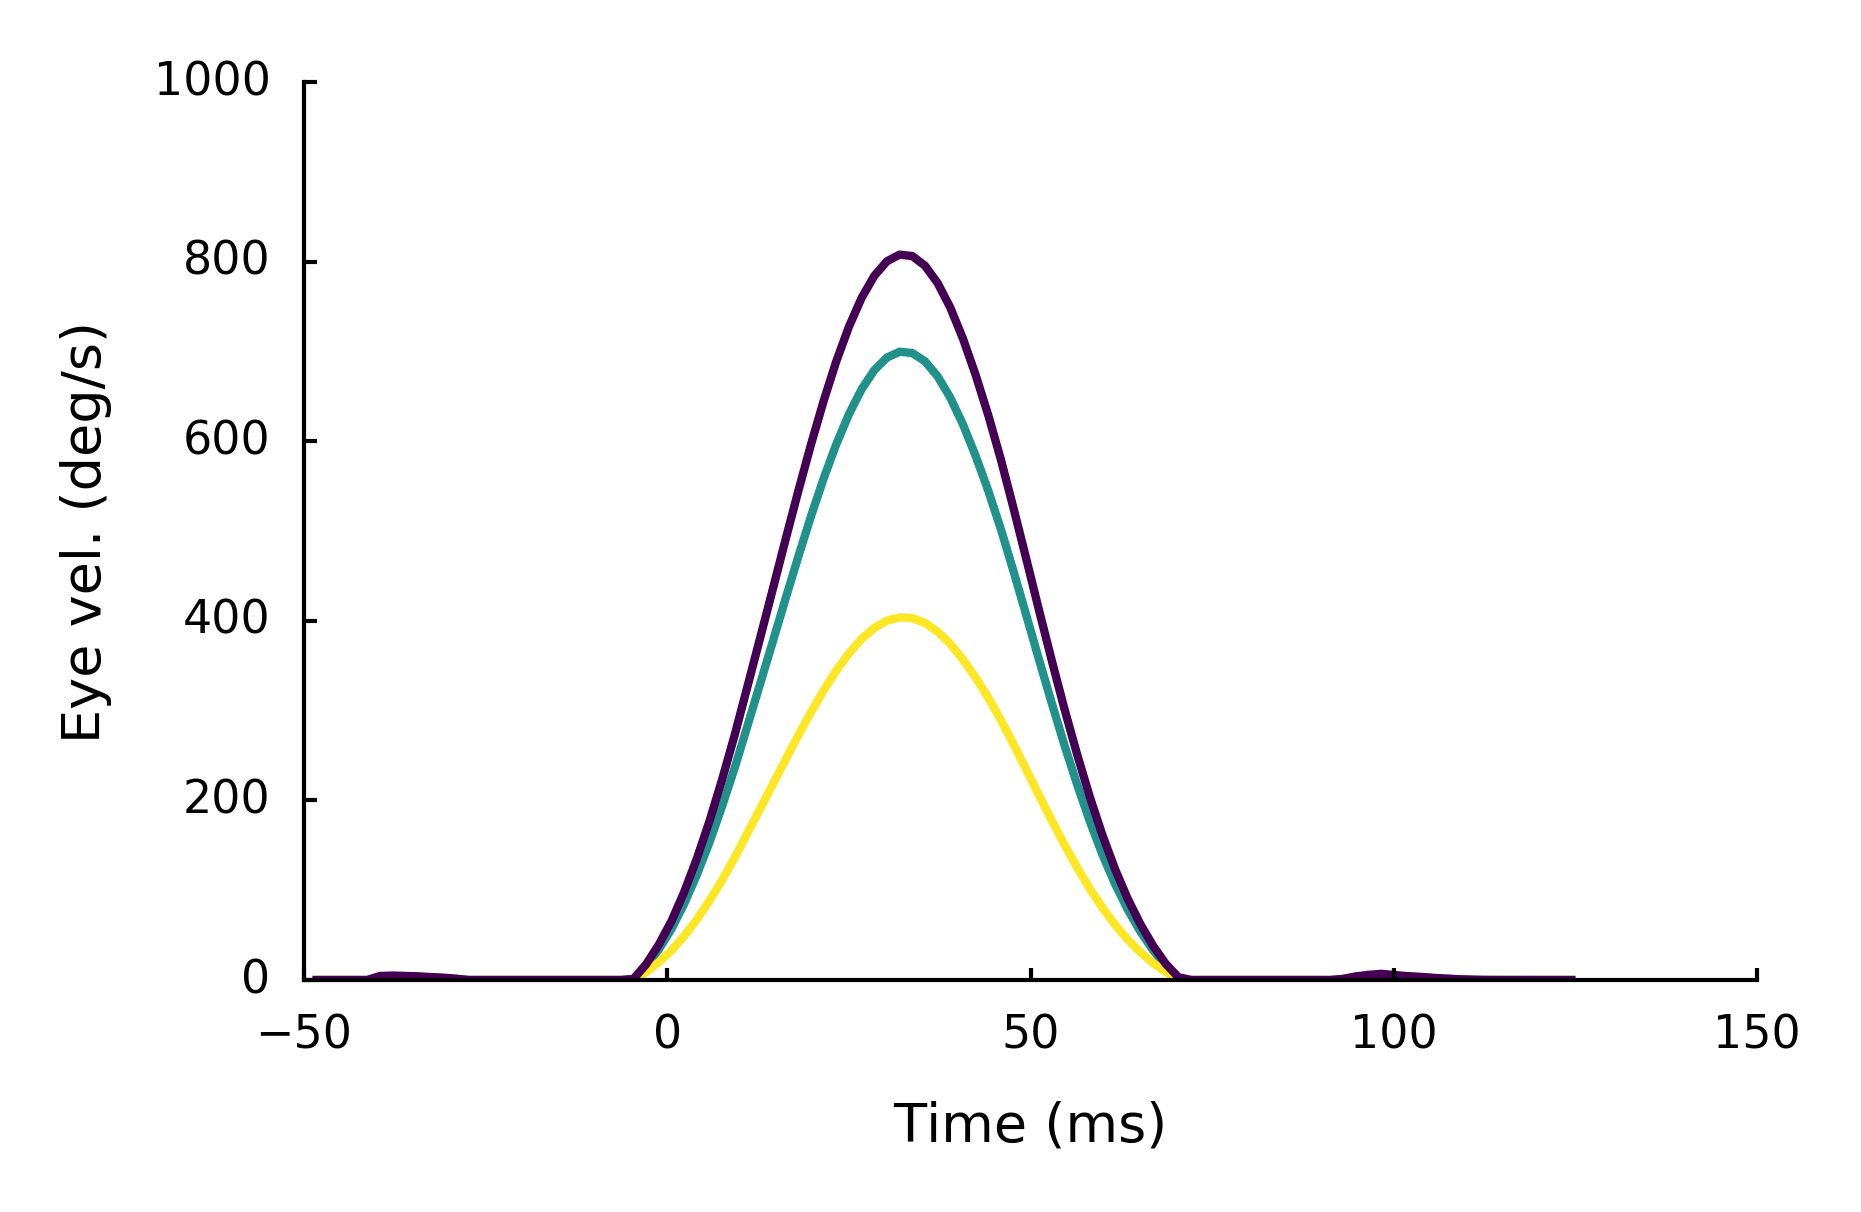

In [7]:
vel = diff(psmooth) / diff(tnew) / 1e-3
velhor = diff(phorsmooth) / diff(tnew) / 1e-3
velver = diff(pversmooth) / diff(tnew) / 1e-3

vel[vel<0] = 0
velver[velver<0] = 0
velhor[velhor<0] = 0
vel[0:5] = 0
velver[0:5] = 0
velhor[0:5] = 0
plot(tnew[1:]-start, velhor, color=colorpic3(0.5), lw=1)
plot(tnew[1:]-start, velver, color=colorpic3(1.), lw=1)
plot(tnew[1:]-start, vel, color=colorpic3(0.), lw=1)

ax = gca()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Eye vel. (deg/s)')
ax.set_yticks([0, 200, 400, 600, 800, 1000])
simpleaxis(ax)